In [3]:
import pandas as pd
from plotnine import *
import numpy as np
import multiprocessing
from adjustText import adjust_text

## Fig 6: t-SNE embedding with archaelogical samples

In [4]:
s = "../../data/sourcepredict/sourcepredict_embedding.csv"
s_pred = "../../data/sourcepredict/prediction.sourcepredict.csv"

In [5]:
sp = pd.read_csv(s, index_col=0)

In [6]:
spp = pd.read_csv(s_pred, index_col=0).T

In [7]:
conditions = [(spp['Canis_familiaris'] > 0.5) ,
              (spp['Homo_sapiens'] > 0.5),
              (spp['Soil'] > 0.5),
              (spp['unknown'] > 0.5)
             ]
choices = ['Canis familiaris', 'Homo sapiens', 'Soil', 'Unknown']
spp['Predicted organism'] = np.select(conditions, choices, default='Unknown')

In [8]:
sp['organism'] = sp.drop(spp.index, axis=0)['labels'].append(spp['Predicted organism'])

In [9]:
sp['ml'] = np.where(sp['labels'] == 'sink', 'predicted', 'reference')

In [10]:
sp['organism'].value_counts()

Homo_sapiens        262
Canis_familiaris    150
Soil                 25
Homo sapiens          8
Unknown               5
Canis familiaris      2
Name: organism, dtype: int64

In [11]:
sp['organism'] = sp['organism'].str.replace('_'," ")

In [12]:
sp.sample(10)

,PC1,PC2,labels,name,organism,ml
SRR7658687,-6.704141,-17.084297,Homo_sapiens,SRR7658687,Homo sapiens,reference
ERR1915610,25.084990,5.461955,Canis_familiaris,ERR1915610,Canis familiaris,reference
SRR1761721,-20.018070,2.102032,Homo_sapiens,SRR1761721,Homo sapiens,reference
SRR2188726,-18.114988,-18.086832,Homo_sapiens,SRR2188726,Homo sapiens,reference
SRR7658674,-8.334581,0.585581,Homo_sapiens,SRR7658674,Homo sapiens,reference
ERR2402765,16.779345,12.624532,Canis_familiaris,ERR2402765,Canis familiaris,reference
SRR2193437,-14.024547,5.067958,Homo_sapiens,SRR2193437,Homo sapiens,reference
SRR7658597,-19.196331,-1.257208,Homo_sapiens,SRR7658597,Homo sapiens,reference
SRR7658640,-12.288069,-17.072565,Homo_sapiens,SRR7658640,Homo sapiens,reference
SRR063469,2.448314,24.149035,Homo_sapiens,SRR063469,Homo sapiens,reference


In [13]:
sp_ref = sp.query('ml == "reference"')
sp_pred = sp.query('ml == "predicted"')

In [14]:
sample_type = pd.DataFrame({
    'AHP003':['Coprolite', '11' ],
    'CMN001':['Archaelogical sediment','19'],
    'ZSM005':['Coprolite','02'],
    'ZSM002':['Coprolite','01'],
    'ZSM029':['Coprolite','07'],
    'YRK001':['Coprolite','13'],
    'ZSM025':['Coprolite','04'],
    'ZSM028':['Coprolite','06'],
    'ZSM031':['Coprolite','08'],
    'ZSM023':['Coprolite','03'],
    'ECO004':['Archaelogical sediment','18'],
    'AHP001':['Coprolite','09'],
    'AHP002':['Coprolite','10'],
    'CBA001':['Archaelogical sediment','15'],
    'LEI010':['Archaelogical sediment','17'],
    'AHP004':['Coprolite','12'],
    'DRL001':['Archaelogical sediment','14'],
    'ZSM027':['Coprolite','05'],
    'BRF001':['Archaelogical sediment','16'],
    'MLP001':['Archaelogical sediment','20'],
}, index = ['sample_type','plot_id'])

In [15]:
sp_pred = sp_pred.merge(sample_type.T, left_index=True, right_index=True)

In [16]:
sp_pred['plot_id'].sort_values()

ZSM002    01
ZSM005    02
ZSM023    03
ZSM025    04
ZSM027    05
ZSM028    06
ZSM029    07
ZSM031    08
AHP001    09
AHP002    10
AHP003    11
AHP004    12
YRK001    13
DRL001    14
CBA001    15
BRF001    16
LEI010    17
ECO004    18
CMN001    19
MLP001    20
Name: plot_id, dtype: object

In [17]:
sp_pred['organism'].value_counts()

Homo sapiens        8
Soil                5
Unknown             5
Canis familiaris    2
Name: organism, dtype: int64

In [18]:
sp_pred.query("organism == 'Canis familiaris'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
AHP004,7.463623,-7.275122,sink,AHP004,Canis familiaris,predicted,Coprolite,12
YRK001,12.980815,1.274512,sink,YRK001,Canis familiaris,predicted,Coprolite,13


In [19]:
sp_pred.query("organism == 'Soil' and sample_type == 'Archaelogical sediment'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
BRF001,-12.659374,-35.260160,sink,BRF001,Soil,predicted,Archaelogical sediment,16
LEI010,-6.298735,-30.463503,sink,LEI010,Soil,predicted,Archaelogical sediment,17
CBA001,-8.971134,-35.102470,sink,CBA001,Soil,predicted,Archaelogical sediment,15


In [20]:
sp_pred.query("sample_type == 'Archaelogical sediment'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
BRF001,-12.659374,-35.260160,sink,BRF001,Soil,predicted,Archaelogical sediment,16
DRL001,-6.732208,-35.138317,sink,DRL001,Unknown,predicted,Archaelogical sediment,14
LEI010,-6.298735,-30.463503,sink,LEI010,Soil,predicted,Archaelogical sediment,17
ECO004,-9.556790,-34.750652,sink,ECO004,Unknown,predicted,Archaelogical sediment,18
MLP001,-6.291108,-30.472930,sink,MLP001,Unknown,predicted,Archaelogical sediment,20
CMN001,-8.172891,-35.017400,sink,CMN001,Unknown,predicted,Archaelogical sediment,19
CBA001,-8.971134,-35.102470,sink,CBA001,Soil,predicted,Archaelogical sediment,15


In [21]:
sp_pred.sort_values("plot_id").merge(spp, left_index=True, right_index=True)[['PC1','PC2','Canis_familiaris','Homo_sapiens','Soil','unknown','Predicted organism','plot_id']].to_csv('sourcepredict_results.csv')

In [22]:
adj_text = sp_pred.query("plot_id == ['01','03']")

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: results/figure6.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


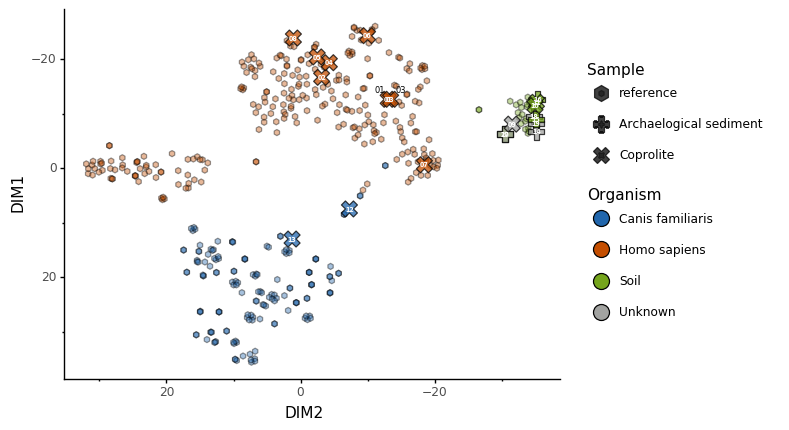

<ggplot: (-9223363243327188848)>

In [23]:
p = ggplot(sp_ref, aes(x='PC1',y='PC2')) + geom_point(aes(fill='organism', shape='ml'), stroke=0.5, color='black', size = 2, alpha=0.4)
p = p + geom_point(data = sp_pred, mapping=aes(x='PC1',y='PC2', fill='organism', shape='sample_type'), stroke=0.5, color='black', size = 6, alpha=0.75)
p = p + geom_text(data = adj_text, mapping= aes(x='PC1', y='PC2', label = 'plot_id'), size=6, adjust_text= {
    'expand_points': (2, 2),
    'expand_objects': (1.5, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'grey'
    },
    'on_basemap':True
})
p = p + geom_text(data = sp_pred, mapping=aes(x='PC1',y='PC2', label='plot_id'), size = 4.5,fontweight = 'bold', color='white')
p = p + scale_shape_manual(name='Sample', values={'Coprolite':'X', 'Archaelogical sediment':'P', 'reference':'h'}) + theme_classic() + labs(x='DIM1',y='DIM2')
p = p + scale_fill_manual(name = 'Organism', values = {"Canis familiaris":"#2166ac","Homo sapiens":"#c44e00", "Soil":"#75a51c", 'Unknown':'#a2a3a1'})
p = p + guides(fill = guide_legend(override_aes = {'alpha':1}))
p = p + coord_flip() + scale_y_reverse() + scale_x_reverse()
p.save("results/figure6.png", dpi=300)
p